## IDS 2018 Dataset

The IDS2018 dataset stands as a significant resource in the realm of network intrusion detection. Crafted for the purpose of advancing intrusion detection systems (IDS), it has become a pivotal component in the study of network security. IDS2018 captures a wide spectrum of network traffic data, spanning both benign and malicious activities. With its diverse network protocols, connection types, and predefined intrusion classes, it provides a realistic and complex environment for analysis and model development. This dataset has gained prominence in research, benchmarking, and educational contexts, solidifying its role in enhancing network security.

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Exploratory Data Analysis](#EDA)
5. [Preprocess dataset](#Preprocess)
6. [Model Building](#Modelling)

<a name="Libraries"></a>
## 1. Importing libraries

In [7]:
import os
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import svm
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
pd.set_option('display.max_columns',None)
from tensorflow.keras import regularizers
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier, VotingClassifier

In [14]:
conda install -n py34 cx_freeze


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\ADMIN\anaconda3_new\envs\py34



In [12]:
from transformers import AutoModel

ImportError: cannot import name 'AutoModel' from 'transformers' (C:\Users\ADMIN\anaconda3_new\Lib\site-packages\transformers\__init__.py)

<a name="Data"></a>
## 2. Loading data

In [1]:
df_train= pd.read_csv(r'C:\Users\ADMIN\Documents\Networkdetection\ids2018\cleaned_ids2018_sampled.csv')

NameError: name 'pd' is not defined

In [3]:
df_train.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


<a name="Statistics"></a>
## 3. Statistical summaries

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252846 entries, 0 to 1252845
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1252846 non-null  int64  
 1   Dst Port           1252846 non-null  int64  
 2   Protocol           1252846 non-null  int64  
 3   Flow Duration      1252846 non-null  int64  
 4   Tot Fwd Pkts       1252846 non-null  int64  
 5   Tot Bwd Pkts       1252846 non-null  int64  
 6   TotLen Fwd Pkts    1252846 non-null  int64  
 7   TotLen Bwd Pkts    1252846 non-null  int64  
 8   Fwd Pkt Len Max    1252846 non-null  int64  
 9   Fwd Pkt Len Min    1252846 non-null  int64  
 10  Fwd Pkt Len Mean   1252846 non-null  float64
 11  Fwd Pkt Len Std    1252846 non-null  float64
 12  Bwd Pkt Len Max    1252846 non-null  int64  
 13  Bwd Pkt Len Min    1252846 non-null  int64  
 14  Bwd Pkt Len Mean   1252846 non-null  float64
 15  Bwd Pkt Len Std    1252846 non-n

In [5]:
df_train.describe()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1252846.0,1252846.0,1252846.0,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1252846.0,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1252846.0,1252846.0,1252846.0,1252846.0,1252846.0,1252846.0,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06,1.252846e+06
mean,5.238727e+05,9.588155e+03,8.313469e+00,1.123717e+07,4.948192e+00,6.590077e+00,1.392080e+03,5.579347e+03,2.115555e+02,9.397622e+00,5.166799e+01,7.700061e+01,3.331753e+02,2.197513e+01,1.077116e+02,1.275320e+02,2.629520e+05,6.412666e+04,3.891897e+06,1.026042e+06,6.390905e+06,4.205112e+06,1.174706e+07,4.155316e+06,1.054539e+06,6.583450e+06,4.322050e+06,6.492204e+06,6.360427e+05,6.918445e+05,2.069425e+06,1.863643e+05,2.926218e-02,0.0,0.0,0.0,3.674974e+02,1.457332e+02,4.085563e+04,2.327103e+04,9.286034e+00,3.804896e+02,7.584724e+01,1.192518e+02,3.989491e+04,3.497637e-03,2.926218e-02,1.839436e-01,4.355212e-01,3.333434e-01,4.720852e-02,0.0,1.839420e-01,8.679076e+01,5.166799e+01,1.077116e+02,0.0,0.0,0.0,0.0,0.0,0.0,4.948192e+00,1.392080e+03,6.590077e+00,5.579392e+03,1.493192e+04,9.178897e+03,1.237123e+00,1.830886e+01,7.112120e+04,3.308383e+04,1.186159e+05,5.104884e+04,5.227947e+06,2.379458e+05,5.441625e+06,4.966927e+06,1.649700e+00
std,3.026476e+05,1.935468e+04,4.619283e+00,7.594986e+08,2.671988e+02,1.624900e+02,6.334609e+04,2.826559e+05,3.108414e+02,2.312893e+01,6.253531e+01,1.200345e+02,4.822189e+02,4.806628e+01,1.652413e+02,1.956342e+02,3.797400e+06,2.986723e+05,7.404437e+08,2.497161e+08,7.950531e+08,1.721979e+07,3.063698e+07,7.404482e+08,2.497172e+08,1.954620e+07,1.742660e+07,2.396192e+07,3.661819e+06,2.927942e+06,9.008842e+06,3.067016e+06,1.685406e-01,0.0,0.0,0.0,1.556601e+04,3.890884e+03,2.126593e+05,1.235655e+05,2.216134e+01,5.032455e+02,1.078422e+02,1.602309e+02,8.124096e+04,5.903733e-02,1.685406e-01,3.874383e-01,4.958253e-01,4.714083e-01,2.120847e-01,0.0,3.874370e-01,1.128315e+02,6.253531e+01,1.652413e+02,0.0,0.0,0.0,0.0,0.0,0.0,2.671988e+02,6.334609e+04,1.624900e+02,2.826714e+05,2.132031e+04,2.041888e+04,2.605071e+02,7.243993e+00,1.056708e+06,5.714664e+05,1.398053e+06,9.293325e+05,1.773220e+08,1.262057e+08,2.907424e+08,2.632555e+07,1.304563e+00
min,0.000000e+00,0.000000e+00,0.000000e+

In [6]:
df_train.shape

(1252846, 79)

In [7]:
# Check for missing values
df_train.isnull().sum().any()

False

No missing values nor duplicate this shows that this dataset was well cleaned.

## Preprocessing

In [8]:
target = 'Label'
print(df_train.Label.value_counts())

1     971016
4     137185
5      57507
2      38703
3      37323
6       8377
7       2234
8        332
9        103
10        55
11        11
Name: Label, dtype: int64


In [9]:
old_value = 1
new_value = 0
df_train['Label'] = df_train['Label'].replace(old_value, new_value)

In [10]:
for i in range(2, 12):
    old_value = i
    new_value = 1
    df_train['Label'] = df_train['Label'].replace(old_value, new_value)

In [11]:
df_train.Label.value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
1252841    0
1252842    0
1252843    0
1252844    0
1252845    0
Name: Label, Length: 1252846, dtype: int64>

In [12]:
df_train["Label"].value_counts()

0    971016
1    281830
Name: Label, dtype: int64

In [13]:
import joblib
import sklearn
from sklearn.utils import class_weight
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_train
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df["Label"].value_counts().values[0:1],
           x=['Normal'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df["Label"].value_counts().values[1:2],
           x=['Attack'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)


In [14]:
df1 = df[df["Label"] == 0][:25000]
df2 = df[df["Label"] == 1][:25000]
df_equal = pd.concat([ df1,df2], axis =0)

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Normal', 
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Normal'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Attack', 
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Attack'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [17]:
df_equal.groupby(target)['Bwd Pkts/s'].value_counts(normalize=True).sort_values(ascending=False)
df_equal

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.777770,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,0
1,512109,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.500000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,0
2,807703,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.000000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,0
3,491912,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.764710,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,0
4,858679,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.000000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111891,474617,80,6,6520,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,306.748466,6.520000e+03,0.000000e+00,6520,6520,6520,6520.0,0.000000e+00,6520,6520,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,306.748466,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.00000,0.000000,0.00000,0,0,0,0,0

<a name="EDA"></a>
## 4. Exploratory Data Analysis

In [18]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols,figsize=(18, 18))
    colors = plt.cm.Set3(np.linspace(0, 1, len(cols_list)))  # Custom color palette

    for ax, col, color in zip(axes.ravel(), cols_list, colors):
        counts = df[col].value_counts()
        wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', colors=plt.cm.Set3(np.random.rand(len(counts)))) 
        ax.set_title(str(col), fontsize=15)
        plt.setp(autotexts, size=10)  # Set font size for autopct labels
        
    plt.show()

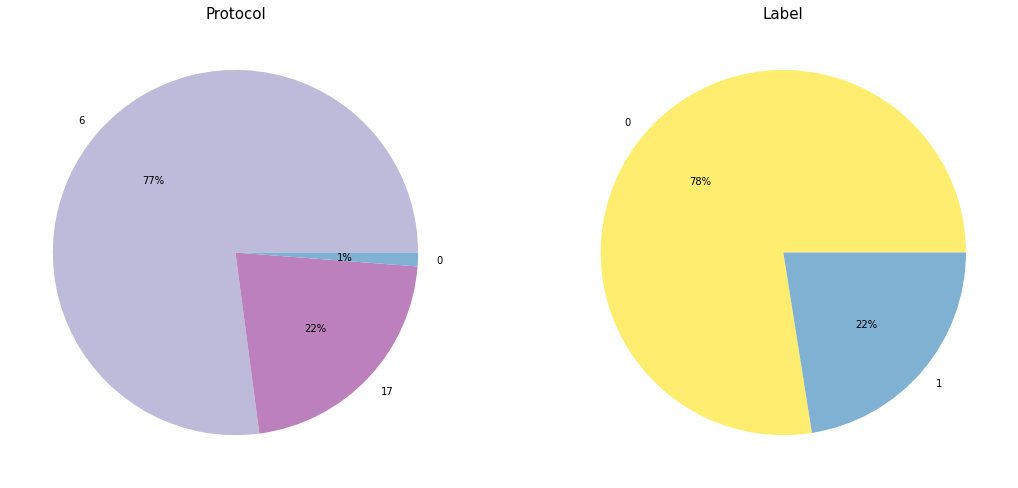

In [19]:
pie_plot(df_train, ['Protocol', 'Label'], 1, 2)

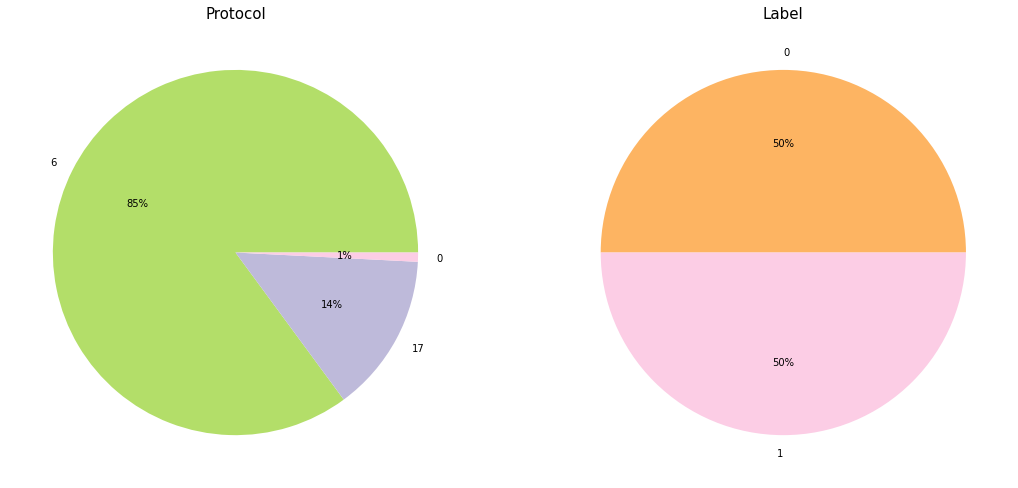

In [20]:
pie_plot(df_equal, ['Protocol', 'Label'], 1, 2)

<a name="Preprocess"></a>
## 5.  Preprocess dataset

In [21]:
df_train.drop(['Unnamed: 0'], axis=1,inplace=True)
#Dropped the unnamed:0 as it adds no value to our datasets

In [22]:
df_equal.drop(['Unnamed: 0'], axis=1,inplace=True)
#Dropped the unnamed:0 as it adds no value to our datasets

In [23]:
# Separate features and labels for classification
X = df_equal.drop('Label', axis=1)
y = df_equal['Label']

# Convert labels to numerical values
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

In [24]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X.shape

(50000, 77)

In [26]:
# Split the data into train and validation sets
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.1, random_state=0)

In [27]:
# Separate features and labels for regression
X = df_equal.drop('Label', axis=1)
y_reg = df_equal['Label']

# Standardize the features for regression
scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X)

# Split the data into train and validation sets for regression
X_train_reg, X_val1_reg, y_train_reg, y_val1_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_val1_reg, y_val1_reg, test_size=0.1, random_state=0)

In [28]:
def evaluate_regression(model, name, X_train, X_test, y_train, y_test):
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

    print("Training RMSE " + str(name) + ": {:.4f}".format(train_rmse))
    print("Test RMSE " + str(name) + ": {:.4f}".format(test_rmse))


In [29]:
classification_evals = {}

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(np.array(X_train)))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(np.array(X_test)))
    train_precision = metrics.precision_score(y_train, model.predict(np.array(X_train)))
    test_precision = metrics.precision_score(y_test, model.predict(np.array(X_test)))
    train_recall = metrics.recall_score(y_train, model.predict(np.array(X_train)))
    test_recall = metrics.recall_score(y_test, model.predict(np.array(X_test)))

    classification_evals[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
    }

    print("Training Accuracy " + str(name) + ": {:.2f}".format(train_accuracy * 100))
    print("Test Accuracy " + str(name) + ": {:.2f}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + ": {:.2f}".format(train_precision * 100))
    print("Test Precision " + str(name) + ": {:.2f}".format(test_precision * 100))
    print("Training Recall " + str(name) + ": {:.2f}".format(train_recall * 100))
    print("Test Recall " + str(name) + ": {:.2f}".format(test_recall * 100))

    # Plot the confusion matrix
    actual = y_test
    predicted = model.predict(np.array(X_test))
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal','attack'])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cm_display.plot(ax=ax)


<a name="Modelling"></a>
## 6.  Model Building

### Logistic Regression

Training Accuracy Logistic Regression: 97.83
Test Accuracy Logistic Regression: 97.47
Training Precision Logistic Regression: 96.00
Test Precision Logistic Regression: 95.24
Training Recall Logistic Regression: 99.83
Test Recall Logistic Regression: 99.87


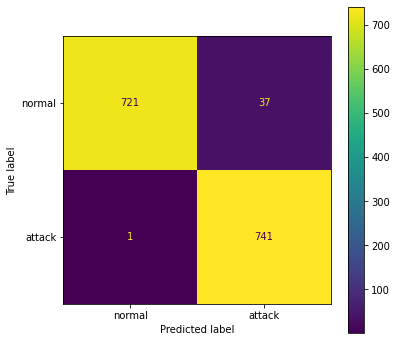

In [30]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

### Knearest neighbors

Training Accuracy KNeighborsClassifier: 99.74
Test Accuracy KNeighborsClassifier: 99.67
Training Precision KNeighborsClassifier: 99.81
Test Precision KNeighborsClassifier: 99.60
Training Recall KNeighborsClassifier: 99.67
Test Recall KNeighborsClassifier: 99.73


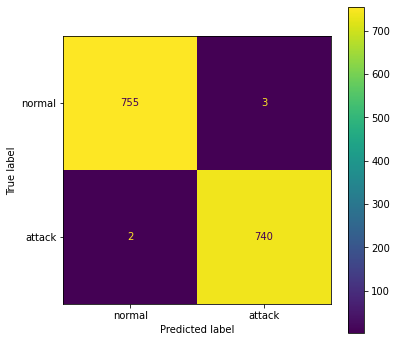

In [31]:
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

### Naive Bayes

Training Accuracy GaussianNB: 90.81
Test Accuracy GaussianNB: 90.87
Training Precision GaussianNB: 85.25
Test Precision GaussianNB: 85.13
Training Recall GaussianNB: 98.78
Test Recall GaussianNB: 98.79


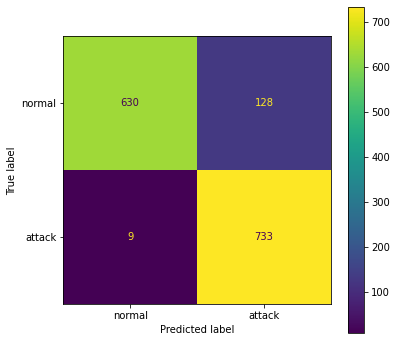

In [32]:
#dfequal
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

### SVM

Training Accuracy Linear SVC(LBasedImpl): 98.22
Test Accuracy Linear SVC(LBasedImpl): 97.87
Training Precision Linear SVC(LBasedImpl): 96.75
Test Precision Linear SVC(LBasedImpl): 95.98
Training Recall Linear SVC(LBasedImpl): 99.81
Test Recall Linear SVC(LBasedImpl): 99.87


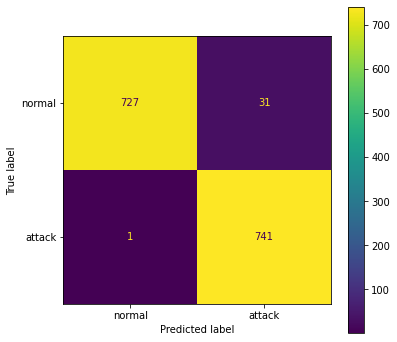

In [34]:
lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

### Decision Tree

Training Accuracy DecisionTreeClassifier: 100.00
Test Accuracy DecisionTreeClassifier: 100.00
Training Precision DecisionTreeClassifier: 100.00
Test Precision DecisionTreeClassifier: 100.00
Training Recall DecisionTreeClassifier: 100.00
Test Recall DecisionTreeClassifier: 100.00


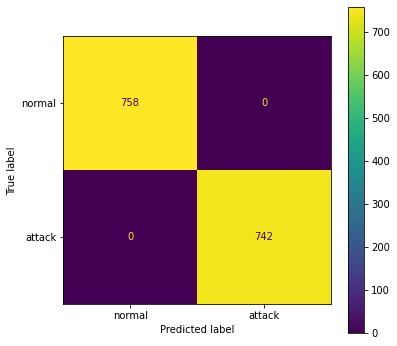

In [35]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

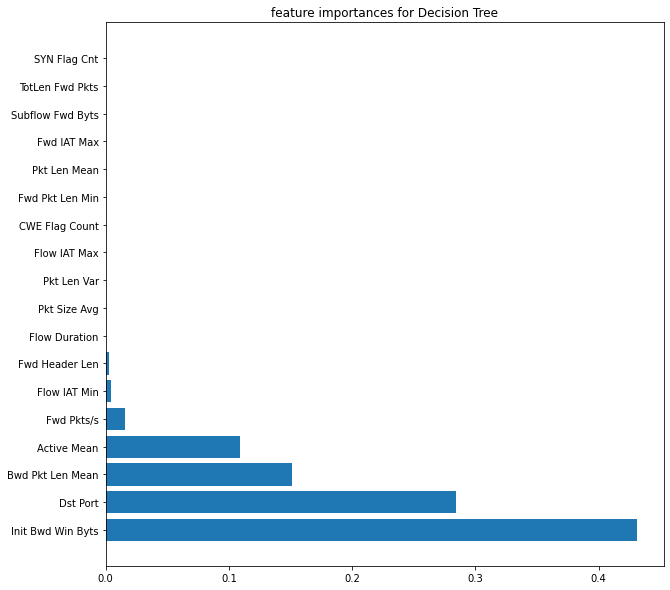

In [36]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = df_train.drop(['Bwd Pkts/s', 'Label'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5769230769230769, 0.875, 'X[65] <= 0.286\ngini = 0.5\nsamples = 35000\nvalue = [17442, 17558]'),
 Text(0.3076923076923077, 0.625, 'X[13] <= -0.343\ngini = 0.375\nsamples = 20168\nvalue = [15118, 5050]'),
 Text(0.15384615384615385, 0.375, 'X[65] <= -0.809\ngini = 0.499\nsamples = 9665\nvalue = [4663, 5002]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.407\nsamples = 5707\nvalue = [4082, 1625]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.25\nsamples = 3958\nvalue = [581, 3377]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= 2.623\ngini = 0.009\nsamples = 10503\nvalue = [10455, 48]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.001\nsamples = 10454\nvalue = [10451, 3]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.15\nsamples = 49\nvalue = [4, 45]'),
 Text(0.8461538461538461, 0.625, 'X[0] <= -0.416\ngini = 0.264\nsamples = 14832\nvalue = [2324, 12508]'),
 Text(0.7692307692307693, 0.375, 'X[11] <= 2.058\ngini = 0.004\nsamples = 12535\nvalue = [27, 12508]'),
 Text(0.6923076923076923

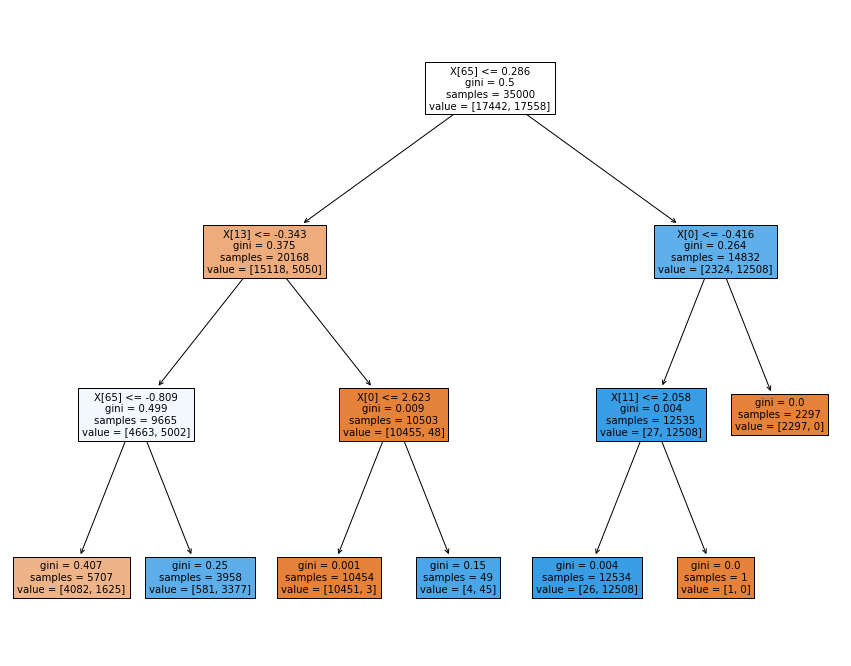

In [37]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

Training Accuracy RandomForestClassifier: 100.00
Test Accuracy RandomForestClassifier: 99.93
Training Precision RandomForestClassifier: 100.00
Test Precision RandomForestClassifier: 100.00
Training Recall RandomForestClassifier: 100.00
Test Recall RandomForestClassifier: 99.87


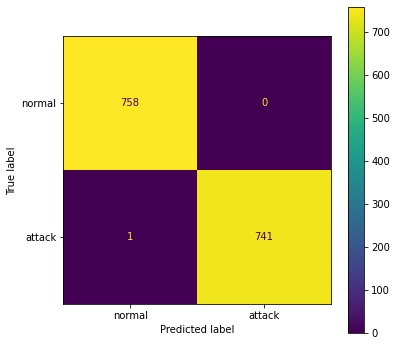

In [38]:
rf = RandomForestClassifier().fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

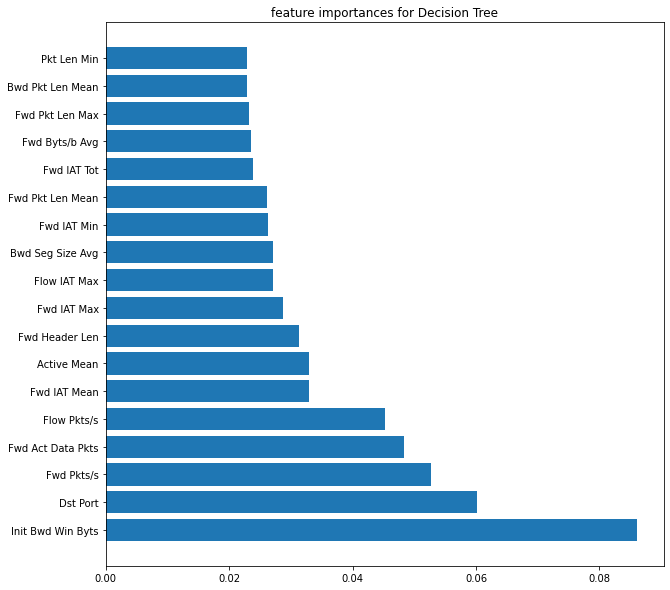

In [39]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

### XGBOOST Regressor in order to predict threat level

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [41]:
dtrain_reg = xgb.DMatrix(X_train_reg, label=y_train_reg)

In [42]:
params_reg = {
    'objective': 'reg:squarederror',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}
num_rounds_reg = 100
model_reg = xgb.train(params_reg, dtrain_reg, num_rounds_reg)


In [43]:
# Train XGBoost regressor
xg_r = xgb.XGBRegressor(objective='reg:linear', n_estimators=20).fit(X_train_reg, y_train_reg)

[17:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(X_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(X_test_reg), squared=False)
print("Training Error " + str(name) + ": {:.4f}".format(train_error))
print("Test Error " + str(name) + ": {:.4f}".format(test_error))

Training Error XGBOOST: 0.0082
Test Error XGBOOST: 0.0205


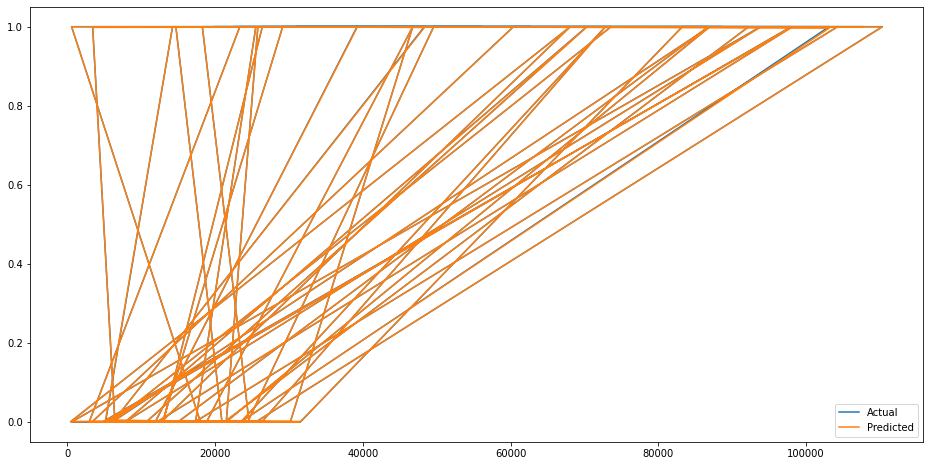

In [45]:
y_pred = xg_r.predict(X_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg, "Y_pred": y_pred})
plt.figure(figsize=(16, 8))
plt.plot(df[:80])
plt.legend(['Actual', 'Predicted'])
plt.show()

### Bagging Ensemble

In [46]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC

In [47]:
# Create base classifiers for the ensemble
base_classifier_dt = DecisionTreeClassifier()
base_classifier_lr = LogisticRegression()
base_classifier_knn = KNeighborsClassifier(n_neighbors=20)
base_classifier_nb = GaussianNB()
base_classifier_svc = CalibratedClassifierCV(LinearSVC())
base_classifier_xgb = xgb.XGBClassifier()

In [48]:
# Create the bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier_dt, n_estimators=20)

In [49]:
# Fit the bagging ensemble on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

Training Accuracy Bagging Ensemble: 100.00
Test Accuracy Bagging Ensemble: 99.93
Training Precision Bagging Ensemble: 100.00
Test Precision Bagging Ensemble: 100.00
Training Recall Bagging Ensemble: 99.99
Test Recall Bagging Ensemble: 99.87


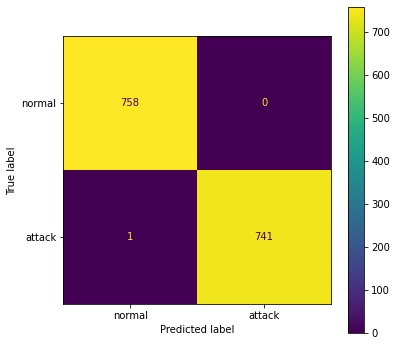

In [50]:
# Evaluate the bagging ensemble
evaluate_classification(bagging_classifier, "Bagging Ensemble", X_train, X_test, y_train, y_test)


### Voting Ensemble

In [51]:
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', base_classifier_lr),
        ('knn', base_classifier_knn),
        ('nb', base_classifier_nb),
        ('svc', base_classifier_svc),
        ('xgb', base_classifier_xgb)
    ],
    voting='soft'  # Use 'soft' voting for probabilities, or 'hard' for majority voting
)

In [52]:
# Fit the voting ensemble on the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('nb', GaussianNB()),
                             ('svc',
                              CalibratedClassifierCV(base_estimator=LinearSVC())),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_cat...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

Training Accuracy Voting Ensemble: 99.48
Test Accuracy Voting Ensemble: 99.07
Training Precision Voting Ensemble: 99.11
Test Precision Voting Ensemble: 98.28
Training Recall Voting Ensemble: 99.85
Test Recall Voting Ensemble: 99.87


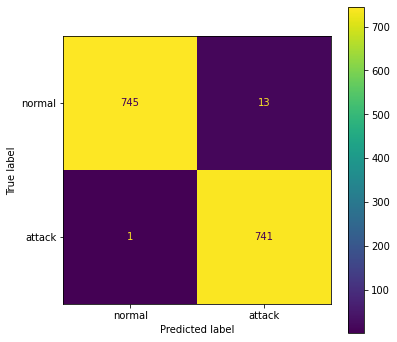

In [53]:
# Evaluate the voting ensemble
evaluate_classification(voting_classifier, "Voting Ensemble", X_train, X_test, y_train, y_test)

### XGB Classifier

In [54]:
base_classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Training Accuracy XGBoost: 100.00
Test Accuracy XGBoost: 99.93
Training Precision XGBoost: 100.00
Test Precision XGBoost: 100.00
Training Recall XGBoost: 100.00
Test Recall XGBoost: 99.87


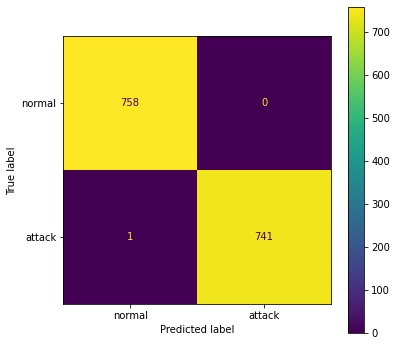

In [55]:
evaluate_classification(base_classifier_xgb, "XGBoost", X_train, X_test, y_train, y_test)

## Neural Networks

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [57]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4992      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [59]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [60]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1094/1094 [==============================] - 9s 5ms/step - loss: 0.2232 - accuracy: 0.9658 - val_loss: 0.1185 - val_accuracy: 0.9953
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.1030 - accuracy: 0.9939 - val_loss: 0.0828 - val_accuracy: 0.9980
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0736 - accuracy: 0.9949 - val_loss: 0.0672 - val_accuracy: 0.9953
Epoch 4/10
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0605 - accuracy: 0.9957 - val_loss: 0.0535 - val_accuracy: 0.9960
Epoch 5/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0486 - accuracy: 0.9964 - val_loss: 0.0537 - val_accuracy: 0.9940
Epoch 6/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0447 - accuracy: 0.9961 - val_loss: 0.0425 - val_accuracy: 0.9973
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0380 - accuracy: 0.9967 - val_loss: 0.0433 - val_accuracy:

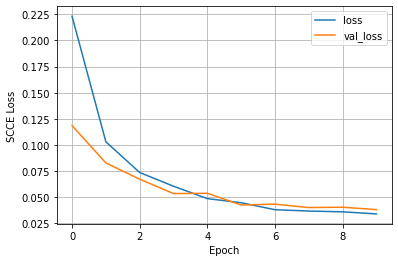

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

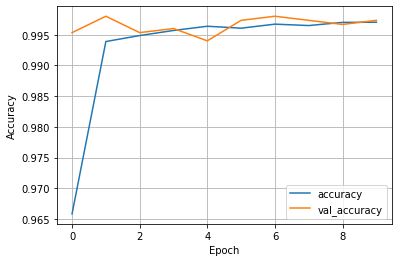

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

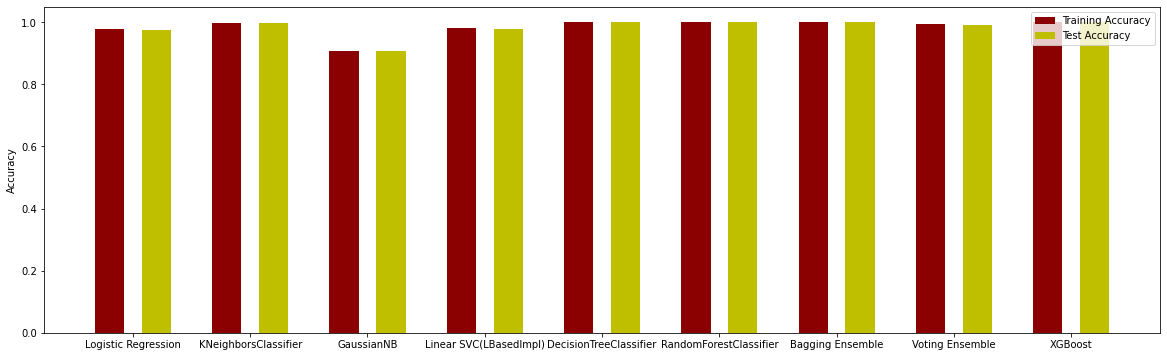

In [63]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Accuracy'] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Accuracy'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

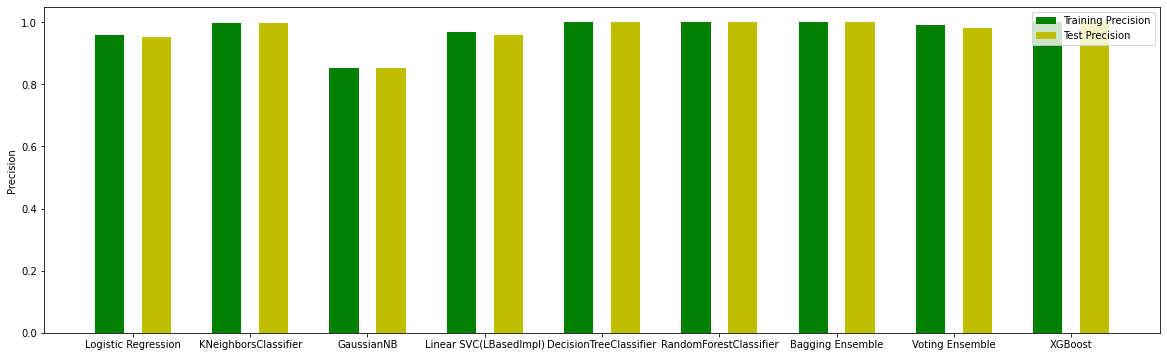

In [64]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Precision'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Precision'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Precision", "Test Precision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precision")
plt.show()

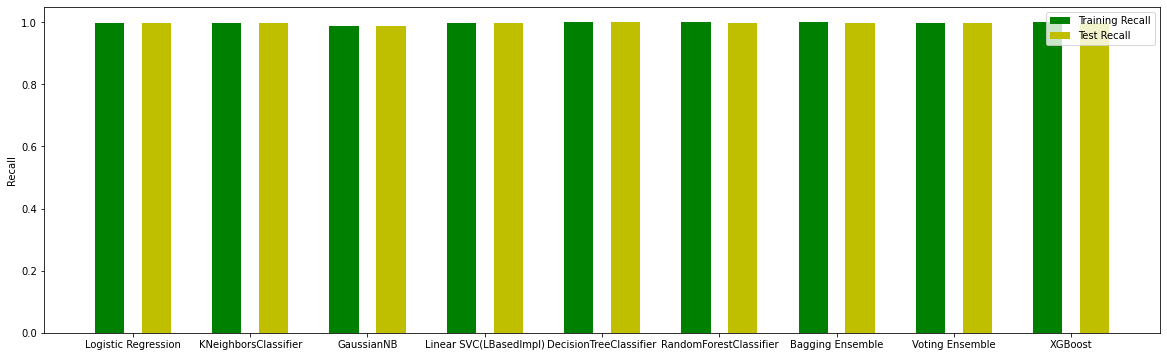

In [65]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Recall'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Recall'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()